## NMF Implementation for Dimensionality Reduction

In [12]:
# Imports cell
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

### KL-NMF Multiplicative Update Formulas:
Hnext = H * ((Wt dot (V / (W dot H))) / (Wt dot 1) )

Wnext = W * (((V / (W dot H)) dot Ht) / (1 dot Ht) )

Normalize the basis vectors - Sun

***Note -- scikit-learn's NMF usage documentation is misleading:***
*They call W the transformed data, and H the factorization matrix (dictionary elements). In reality, W is the factorization matrix (dictionary elements), and H is the transformed data*

In [13]:
class OurNMF:
    def __init__(self, n_components, learn_iter=200):
        self.n_components_ = n_components
        self.learn_iter_ = learn_iter
    
    # Private method - core functionality
    def __nmf(self, input_df):
        input_matrix = input_df.to_numpy().T
        activations = np.random.rand(self.n_components_, input_matrix.shape[1])
        basis_vectors = np.random.rand(input_matrix.shape[0], self.n_components_)
        basis_vectors = normalize(basis_vectors)
        ones = np.ones(input_matrix.shape)
    
        for _ in range(self.learn_iter_):
            activations *= ((basis_vectors.T @ (input_matrix / (basis_vectors @ activations))) / (basis_vectors.T @ ones))
            basis_vectors *= (((input_matrix / (basis_vectors @ activations)) @ activations.T) / (ones @ activations.T))
            basis_vectors = normalize(basis_vectors)
            
        return basis_vectors.T, activations.T
    
    # Public methods
    # Useless function - similar to scikit-learn, but call fit_transform to get transformed values back
    def fit(self, input_df):
        self.basis_vecs_, self.trans_vals_ = self.__nmf(input_df)
        
    def fit_transform(self, input_df):
        self.basis_vecs_, self.trans_vals_ = self.__nmf(input_df)
        return self.trans_vals_


# def my_nmf(input_df, n_components, learn_iter=200):
#     input_matrix = input_df.to_numpy().T
    
# #     print('Input Matrix Shape:\n', input_matrix.shape)
# #     print('n comp:', n_components)
    
#     activations = np.random.rand(n_components, input_matrix.shape[1])
#     basis_vectors = np.random.rand(input_matrix.shape[0], n_components)
#     ones = np.ones(input_matrix.shape)
    
#     basis_vectors = normalize(basis_vectors)
    
# #     print('Activations:\n', activations)
# #     print('Basis Vectors:\n', basis_vectors)
# #     print('Ones:\n', ones)
    
#     for _ in range(learn_iter):
#         activations *= ((basis_vectors.T @ (input_matrix / (basis_vectors @ activations))) / (basis_vectors.T @ ones))
#         basis_vectors *= (((input_matrix / (basis_vectors @ activations)) @ activations.T) / (ones @ activations.T))
        
#         basis_vectors = normalize(basis_vectors)
    
# #     print('Activations:\n', activations)
# #     print('Basis Vectors:\n', basis_vectors)

# #     basis_vecs = pd.DataFrame(basis_vectors.T, columns=list(input_df.columns))
# #     trans_vals = pd.DataFrame(activations.T, columns=[('PC' + str(i + 1)) for i in range(n_components)])
    
# #     return basis_vecs, trans_vals
#     return basis_vectors.T, activations.T

## Temp Work Space

In [14]:
dummy_data = [{'A': 1.00, 'B': 'K', 'C': 3, 'D': 9, 'E': 43.76, 'ans': 1},
              {'A': 0.99, 'B': 'L', 'C': 3, 'D': 8, 'E': 43.45, 'ans': 0},
              {'A': 0.54, 'B': 'M', 'C': 0, 'D': 23, 'E': 54.65, 'ans': 1},
              {'A': 1.00, 'B': 'M', 'C': 0, 'D': 12, 'E': 40.15, 'ans': 0},
              {'A': 0.32, 'B': 'L', 'C': 1, 'D': 12, 'E': 89.04, 'ans': 1},
              {'A': 0.43, 'B': 'L', 'C': 4, 'D': 11, 'E': 49.04, 'ans': 0},
              {'A': 0.99, 'B': 'M', 'C': 1, 'D': 10, 'E': 34.54, 'ans': 0}]

dummy_df = pd.DataFrame(dummy_data)
dummy_df

,A,B,C,D,E,ans
0,1.00,K,3,9,43.76,1
1,0.99,L,3,8,43.45,0
2,0.54,M,0,23,54.65,1
3,1.00,M,0,12,40.15,0
4,0.32,L,1,12,89.04,1
5,0.43,L,4,11,49.04,0
6,0.99,M,1,10,34.54,0


In [15]:
quant = pd.get_dummies(dummy_df['B'])
quant

,K,L,M
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,0,1


In [16]:
dummy_df = dummy_df.drop('B', axis=1)
dummy_df = pd.concat((dummy_df, quant), axis=1)
dummy_df

,A,C,D,E,ans,K,L,M
0,1.00,3,9,43.76,1,1,0,0
1,0.99,3,8,43.45,0,0,1,0
2,0.54,0,23,54.65,1,0,0,1
3,1.00,0,12,40.15,0,0,0,1
4,0.32,1,12,89.04,1,0,1,0
5,0.43,4,11,49.04,0,0,1,0
6,0.99,1,10,34.54,0,0,0,1


### Clustering Experiments & Hypotheses:
**Experiment 1:** If we reduce dimensions on a dataset via NMF & sklearn NMF, and then cluster at each dimension drop, see how clusters compare to true labels.

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


2    0.511429
3    0.534286
4    0.660000
5    0.554286
6    0.571429
7    0.568571
Name: My NMF - Cluster Acc for Dim, dtype: float64

2    0.494286
3    0.477143
4    0.528571
5    0.528571
6    0.551429
7    0.520000
Name: NMF - Cluster Acc for Dim, dtype: float64

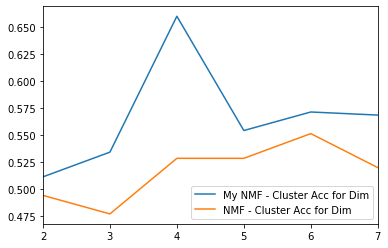

In [17]:
X = dummy_df.drop('ans', axis=1)
y = dummy_df['ans']
total_dim = len(X.columns)

avg_label_accs_my_nmf, avg_label_accs_nmf, avg_label_accs_pca = [], [], []
num_iter = 50
kmeans = KMeans(n_clusters=2)

for _ in range(num_iter):
    label_accs_my_nmf, label_accs_nmf, label_accs_pca = [], [], []
    
    for dim_num in range(2, total_dim + 1):
        # Run NMF to reduce dimensions of dataset
#         _, trans_vals_my_nmf = my_nmf(X, n_components=dim_num)
        my_nmf = OurNMF(n_components=dim_num)
        trans_vals_my_nmf = my_nmf.fit_transform(X)
    #     print('Transformed values for', dim_num, 'dimensions:\n', trans_vals)

        # Default NMF
    #     nmf = NMF(n_components=dim_num)
        # NMF that matches mine: KL-NMF w/ mu
        nmf = NMF(n_components=dim_num, init='random', solver='mu', beta_loss='kullback-leibler')
        trans_vals_nmf = nmf.fit_transform(X)
        
#         pca = PCA(n_components=dim_num)
#         trans_vals_pca = pca.fit_transform(X)

        kmeans.fit(trans_vals_my_nmf)
        clusters_my_nmf = pd.Series(kmeans.labels_)
        kmeans.fit(trans_vals_nmf)
        clusters_nmf = pd.Series(kmeans.labels_)
    #     kmeans.fit(trans_vals_pca)
    #     clusters_pca = pd.Series(kmeans.labels_)

#         if dim_num == 3:
#             print('My NMF TransVals:\n', trans_vals_my_nmf)
#             print('NMF TransVals:\n', trans_vals_nmf)
    #         print('My NMF Clusters:\n', clusters_my_nmf)
    #         print('NMF Clusters:\n', clusters_nmf)
    #         print('Real Labels:\n', y)

        acc_my_nmf = accuracy_score(y, clusters_my_nmf)
        label_accs_my_nmf.append(acc_my_nmf)
        acc_nmf = accuracy_score(y, clusters_nmf)
        label_accs_nmf.append(acc_nmf)
    #     acc_pca = accuracy_score(y, clusters_pca)
    #     label_accs_pca.append(acc_pca)
    
    avg_label_accs_my_nmf.append(label_accs_my_nmf)
    avg_label_accs_nmf.append(label_accs_nmf)
    # avg_label_accs_pca.append(label_accs_pca)

avg_label_accs_my_nmf = np.mean(np.array(avg_label_accs_my_nmf), axis=0)
avg_label_accs_nmf = np.mean(np.array(avg_label_accs_nmf), axis=0)
# avg_label_accs_pca = np.mean(np.array(avg_label_accs_pca), axis=0)

accuracies_my_nmf = pd.Series(avg_label_accs_my_nmf, index=range(2, total_dim + 1), name='My NMF - Cluster Acc for Dim')
accuracies_nmf = pd.Series(avg_label_accs_nmf, index=range(2, total_dim + 1), name='NMF - Cluster Acc for Dim')
# accuracies_pca = pd.Series(avg_label_accs_pca, index=range(2, total_dim + 1), name='PCA - Cluster Acc for Dim')
display(accuracies_my_nmf, accuracies_nmf)
accuracies_my_nmf.plot.line(legend=True)
accuracies_nmf.plot.line(legend=True)
# accuracies_pca.plot.line(legend=True)

In [9]:
# list(X.columns)

In [10]:
# np.random.rand(3,2)

**Experiment 2:** If we cluster, and then reduce dimensions to 2 via NMF & sklearn NMF, see how clusters look in visual comparison (reverse of experiment #1), and look at silouhette scores -- see if difference.

In [11]:
kmeans.fit(X)
clusters = pd.Series(kmeans.labels_)

X

,A,C,D,E,K,L,M
0,1.00,3,9,43.76,1,0,0
1,0.99,3,8,43.45,0,1,0
2,0.54,0,23,54.65,0,0,1
3,1.00,0,12,40.15,0,0,1
4,0.32,1,12,89.04,0,1,0
5,0.43,4,11,49.04,0,1,0
6,0.99,1,10,34.54,0,0,1


**Experiment 3:** If we reduce dimensions on a dataset (H from V = WH), and then approximate it back (WH = V'), we can cluster more accurately due to loss of noise.